In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid")

In [ ]:
df = pd.read_excel('turkiye-cities.xlsx')

df.head()

,id,city,district,area,neighborhood
0,1,Adana,Aladağ,Aladağ,AKPINAR MAH ...
1,2,Adana,Aladağ,Aladağ,BAŞPINAR MAH ...
2,3,Adana,Aladağ,Aladağ,MANSURLU MAH ...
3,4,Adana,Aladağ,Aladağ,SİNANPAŞA MAH ...
4,5,Adana,Aladağ,Madenli,AKÖREN MAH ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             73305 non-null  int64 
 1   city           73305 non-null  object
 2   district       73305 non-null  object
 3   area           73305 non-null  object
 4   neighborhood   73305 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [4]:
df.isnull().sum()

id               0
city             0
district         0
area             0
neighborhood     0
dtype: int64

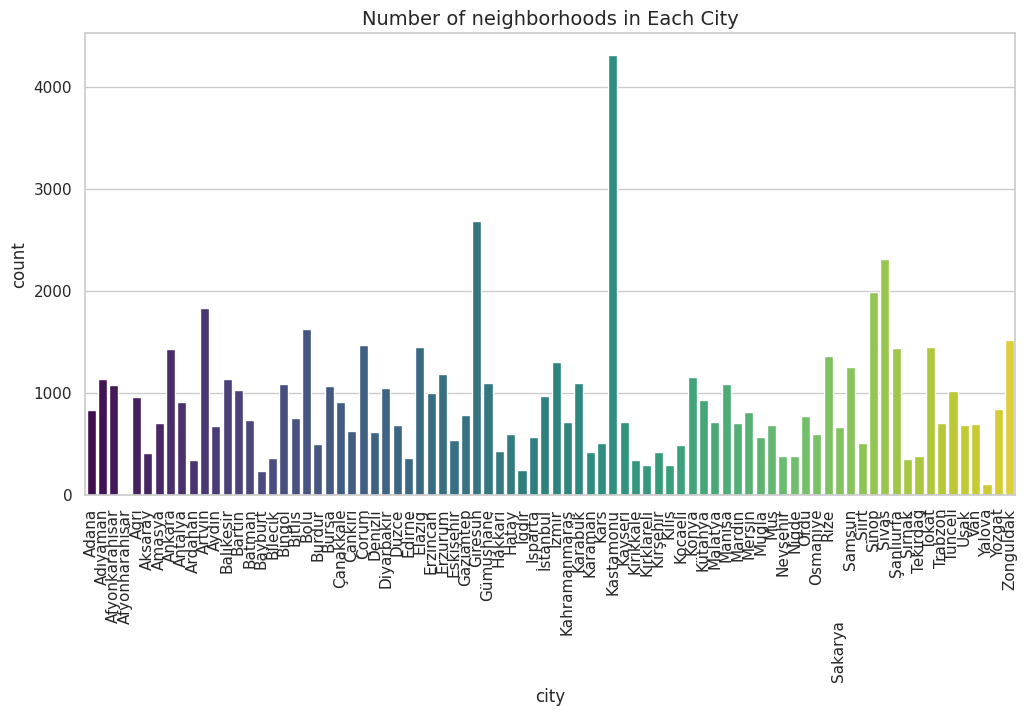

In [5]:
# Number of Districts in Each City
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='city', palette='viridis')
plt.title('Number of neighborhoods in Each City', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [6]:
# lets count number of districts in each city
city_district_count = df.groupby('city')['district'].nunique().reset_index()

# top 5 cities that has the most districts
top_5_cities = city_district_count.sort_values(by='district', ascending=False).head(5)

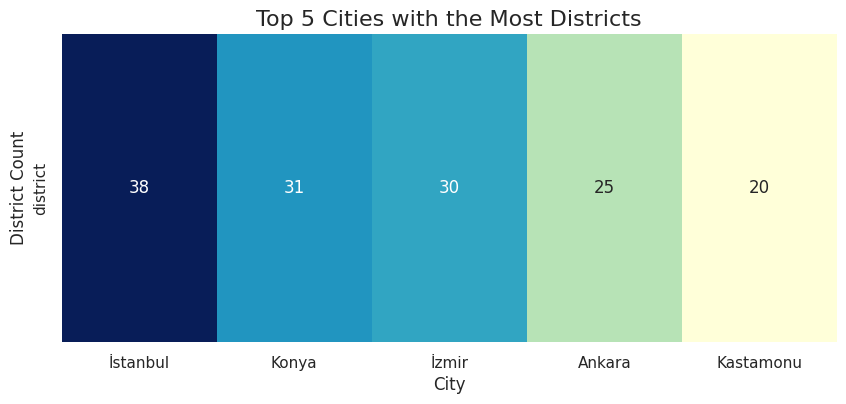

In [7]:
plt.figure(figsize=(10, 4))
sns.heatmap(top_5_cities.set_index('city').T, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Top 5 Cities with the Most Districts', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('District Count', fontsize=12)
plt.show()

In [9]:
# Group by 'City' and 'District' and count the number of unique neighborhoods per district
district_neighborhood_count = df.groupby(['city', 'district'])['neighborhood '].nunique().reset_index()

# Sort by 'Neighborhood' column in descending order and get the top 5 districts with the most neighborhoods
top_5_districts = district_neighborhood_count.sort_values(by='neighborhood ', ascending=False).head(5)

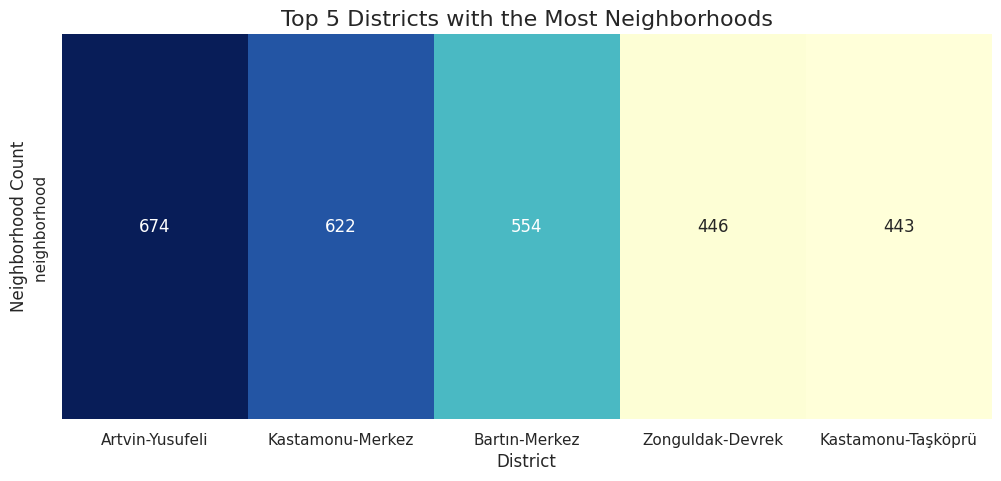

In [10]:
# Visualizing the top 5 districts with most neighborhoods using a heatmap from seaborn
plt.figure(figsize=(12, 5))
sns.heatmap(top_5_districts.set_index(['city', 'district']).T, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Top 5 Districts with the Most Neighborhoods', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Neighborhood Count', fontsize=12)
plt.show()